# Imports

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Fetch data

## Total deaths

In [139]:
death_path = "annual-number-of-deaths-by-cause.csv"
raw_death_df = pd.read_csv(death_path)
raw_death_df

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number),Deaths - Intestinal infectious diseases - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),...,Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number),Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number),Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Self-harm - Sex: Both - Age: All Ages (Number),Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number),Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,2007,15,9121.085992,29066.442137,461.195202,1846.996686,1199.0,53532.680495,...,28477.081107,96.027592,296.000026,10366.124292,160.930121,1941.282198,1378.571549,8216.000975,4691.007199,305.207239
1,Afghanistan,AFG,2008,17,8387.057275,26623.480551,437.718960,1681.270324,1092.0,53402.322328,...,28234.015837,98.308461,0.000000,8994.815981,156.860722,1765.980756,1411.783229,6748.999931,4750.240999,300.246001
2,Afghanistan,AFG,2009,0,7318.273004,24792.335792,415.776634,1568.095029,1065.0,53024.450772,...,27897.481121,100.088778,101.000000,7996.529795,152.144044,1647.863334,1428.808015,7562.996178,4784.225283,295.413907
3,Afghanistan,AFG,2011,2,6919.757958,23115.144836,299.758258,1468.203744,1525.0,52815.737495,...,27198.628720,105.565020,62.000000,7053.113394,150.311602,1543.182842,1496.192418,9061.000023,4954.293898,311.997686
4,Afghanistan,AFG,2012,14,6631.942601,22155.754481,302.255411,1406.214788,3521.0,52961.704530,...,26830.686222,108.281688,333.000006,6577.552474,193.388959,1478.263352,1528.384710,11332.990002,5075.765738,316.256517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6681,Zimbabwe,ZWE,2013,NaN,1820.090331,13108.151347,25.015658,3507.171892,1.0,16900.858090,...,9439.290155,73.649954,125.000002,5129.483596,44.403541,3557.450127,2561.496069,7.000000,2599.112561,410.802638
6682,Zimbabwe,ZWE,2014,NaN,1769.993458,12841.510671,25.623337,3380.319464,0.0,16755.843066,...,9106.657298,73.460128,8.500000,4946.075661,43.073231,3428.811706,2554.170577,3.000000,2625.681137,406.351616
6683,Zimbabwe,ZWE,2015,NaN,1728.691503,12637.728613,25.415872,3263.941226,NaN,16691.109079,...,8887.033499,74.605887,15.500000,4737.642966,42.139866,3310.899062,2583.031015,12.000000,2657.480378,404.641729
6684,Zimbabwe,ZWE,2016,NaN,1703.437894,12495.147292,25.752116,3188.723249,NaN,16781.946571,...,8653.776455,75.907792,31.000000,4602.100769,41.675497,3235.070735,2619.243794,6.000000,2712.995017,405.940831


## Categorized deaths

In [140]:
cat_death_path = "total-number-of-deaths-by-cause.csv"
raw_cat_death_df = pd.read_csv(cat_death_path)
raw_cat_death_df

,Entity,Code,Year,Deaths - Non-communicable diseases - Sex: Both - Age: All Ages (Number),"Deaths - Communicable, maternal, neonatal, and nutritional diseases - Sex: Both - Age: All Ages (Number)",Deaths - Injuries - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,84698.000146,96900.718949,14465.379030
1,Afghanistan,AFG,1991,85229.762662,96602.102786,18036.000741
2,Afghanistan,AFG,1992,88069.819403,101159.624044,19609.459028
3,Afghanistan,AFG,1993,93620.091979,121749.085174,21277.916078
4,Afghanistan,AFG,1994,97706.825332,134449.823769,28059.538434
...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,43813.657226,82444.005046,10900.259416
6464,Zimbabwe,ZWE,2014,43708.402562,73746.515011,10656.544622
6465,Zimbabwe,ZWE,2015,43853.733855,68742.793671,10680.832731
6466,Zimbabwe,ZWE,2016,44364.468727,65173.657699,10735.347076


# Preprocess data

In [151]:
def modify_and_drop_cols(df, rename_cols, drop_cols):
    df = df[df["Year"] > 2007]
    df = df.drop(drop_cols, axis=1)
    cols = list(df.columns)
    for i, col in enumerate(cols):
        if len(col.split(" - ")) > 1:
            rename_cols[col] = col.split(" - ")[1].strip()
    df = df.rename(columns=rename_cols)
    df = df.reset_index(drop=True)
    return df
            

In [162]:
def extract_world_data(df):
    df = df[df["Entity"] == "World"]
    df = df.reset_index(drop=True)
    return df

## Total deaths

In [163]:
raw_columns = raw_death_df.columns
drop_cols = ['Number of executions (Amnesty International)']
rename_cols = {'Terrorism (deaths)': 'Terrorism'}

In [164]:
death_df = modify_and_drop_cols(raw_death_df, rename_cols, drop_cols)

In [165]:
death_df

,Entity,Code,Year,Meningitis,Lower respiratory infections,Intestinal infectious diseases,Protein-energy malnutrition,Terrorism,Cardiovascular diseases,Alzheimer disease and other dementias,...,Neonatal disorders,Alcohol use disorders,Exposure to forces of nature,Diarrheal diseases,Environmental heat and cold exposure,Nutritional deficiencies,Self-harm,Conflict and terrorism,Diabetes mellitus,Poisonings
0,Afghanistan,AFG,2008,8387.057275,26623.480551,437.718960,1681.270324,1092.0,53402.322328,2496.968317,...,28234.015837,98.308461,0.000000,8994.815981,156.860722,1765.980756,1411.783229,6748.999931,4750.240999,300.246001
1,Afghanistan,AFG,2009,7318.273004,24792.335792,415.776634,1568.095029,1065.0,53024.450772,2537.090789,...,27897.481121,100.088778,101.000000,7996.529795,152.144044,1647.863334,1428.808015,7562.996178,4784.225283,295.413907
2,Afghanistan,AFG,2011,6919.757958,23115.144836,299.758258,1468.203744,1525.0,52815.737495,2615.883604,...,27198.628720,105.565020,62.000000,7053.113394,150.311602,1543.182842,1496.192418,9061.000023,4954.293898,311.997686
3,Afghanistan,AFG,2012,6631.942601,22155.754481,302.255411,1406.214788,3521.0,52961.704530,2657.841812,...,26830.686222,108.281688,333.000006,6577.552474,193.388959,1478.263352,1528.384710,11332.990002,5075.765738,316.256517
4,Afghanistan,AFG,2013,6774.892059,22417.229523,402.174478,1423.283631,3709.0,53387.554213,2701.404559,...,26942.203452,111.728148,154.999997,6624.194797,150.711361,1496.911285,1574.109821,11816.974732,5238.074827,333.591091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,Zimbabwe,ZWE,2013,1820.090331,13108.151347,25.015658,3507.171892,1.0,16900.858090,1190.558139,...,9439.290155,73.649954,125.000002,5129.483596,44.403541,3557.450127,2561.496069,7.000000,2599.112561,410.802638
2374,Zimbabwe,ZWE,2014,1769.993458,12841.510671,25.623337,3380.319464,0.0,16755.843066,1191.914868,...,9106.657298,73.460128,8.500000,4946.075661,43.073231,3428.811706,2554.170577,3.000000,2625.681137,406.351616
2375,Zimbabwe,ZWE,2015,1728.691503,12637.728613,25.415872,3263.941226,NaN,16691.109079,1201.436860,...,8887.033499,74.605887,15.500000,4737.642966,42.139866,3310.899062,2583.031015,12.000000,2657.480378,404.641729
2376,Zimbabwe,ZWE,2016,1703.437894,12495.147292,25.752116,3188.723249,NaN,16781.946571,1223.666312,...,8653.776455,75.907792,31.000000,4602.100769,41.675497,3235.070735,2619.243794,6.000000,2712.995017,405.940831


### Extract world data

In [166]:
world_death_df = extract_world_data(death_df)
world_death_df

,Entity,Code,Year,Meningitis,Lower respiratory infections,Intestinal infectious diseases,Protein-energy malnutrition,Terrorism,Cardiovascular diseases,Alzheimer disease and other dementias,...,Neonatal disorders,Alcohol use disorders,Exposure to forces of nature,Diarrheal diseases,Environmental heat and cold exposure,Nutritional deficiencies,Self-harm,Conflict and terrorism,Diabetes mellitus,Poisonings
0,World,OWID_WRL,2008,348040.083847,2.657275e+06,176583.045171,304321.884855,9157.0,1.500828e+07,1.790400e+06,...,2.304429e+06,179987.013172,235496.829431,1.867836e+06,60384.613529,345703.367968,789447.007136,58795.082371,1.045381e+06,78008.099106
1,World,OWID_WRL,2009,340514.177436,2.639562e+06,173745.686452,297263.561629,9273.0,1.527431e+07,1.863444e+06,...,2.258315e+06,175052.864372,9254.003678,1.865671e+06,59023.804629,338690.981517,791222.757559,67916.308722,1.070186e+06,77339.491051
2,World,OWID_WRL,2010,331205.914662,2.623649e+06,170071.404053,299956.052686,7827.0,1.561962e+07,1.943961e+06,...,2.211208e+06,174237.378348,248454.699157,1.857640e+06,115382.599926,341835.027741,796083.645174,50608.273695,1.096402e+06,77298.902918
3,World,OWID_WRL,2011,325000.383494,2.616651e+06,168716.792532,288907.141759,8246.0,1.585974e+07,2.025064e+06,...,2.162070e+06,170736.669200,31964.196615,1.793641e+06,57402.483668,329818.068512,793977.906088,100568.611560,1.129959e+06,76227.682073
4,World,OWID_WRL,2012,316965.020009,2.605154e+06,166735.397312,269574.084338,15497.0,1.611549e+07,2.098871e+06,...,2.110626e+06,169930.031855,6625.594444,1.725018e+06,57658.367887,309650.953725,786335.554940,111432.890101,1.168569e+06,75414.520357
5,World,OWID_WRL,2013,312013.523643,2.590482e+06,164572.376351,259203.023575,22273.0,1.628402e+07,2.168918e+06,...,2.050610e+06,170965.247716,19050.473289,1.664193e+06,55823.991356,298365.543019,779212.549795,115138.255671,1.202743e+06,74906.641101
6,World,OWID_WRL,2014,306484.322622,2.579538e+06,162420.462719,250311.830788,44490.0,1.662836e+07,2.253866e+06,...,1.989193e+06,173684.698467,6503.060539,1.619718e+06,55072.834100,289184.845108,781716.697241,182239.944451,1.249135e+06,74439.682294
7,World,OWID_WRL,2015,298711.517721,2.582199e+06,159257.591692,243750.598948,38853.0,1.713999e+07,2.353634e+06,...,1.925458e+06,178372.485978,14748.187609,1.578439e+06,57740.167042,282498.011863,782941.162890,137629.287532,1.299556e+06,74394.517062
8,World,OWID_WRL,2016,295878.990018,2.574625e+06,155448.606112,236429.610442,34871.0,1.752437e+07,2.440042e+06,...,1.852924e+06,181679.094522,7261.252562,1.550848e+06,54183.052891,274881.027448,788674.564776,158356.402289,1.346428e+06,73643.079320
9,World,OWID_WRL,2017,288021.105387,2.558606e+06,NaN,231770.992044,26445.0,1.779095e+07,2.514619e+06,...,1.783770e+06,184934.241760,9602.935057,1.569556e+06,53349.518780,269996.917689,793823.469135,129720.145674,1.369849e+06,72370.531920


### Predict nan value

In [167]:
intestine_col = "Intestinal infectious diseases"
intestine_data = list(world_death_df[intestine_col])[:-1]
intestine_pred_data = [[i+2008, x] for i, x in enumerate(intestine_data)]

X = np.array(intestine_pred_data)[:,0].reshape(-1,1)
y = np.array(intestine_pred_data)[:,1].reshape(-1,1)

to_predict_x= 2017
to_predict_x= np.array(to_predict_x).reshape(-1,1)

regsr = LinearRegression()
regsr.fit(X,y)
predicted_y = regsr.predict(to_predict_x)

m = regsr.coef_
c = regsr.intercept_
print(c, m)

[5110828.90919456] [[-2457.47232275]]


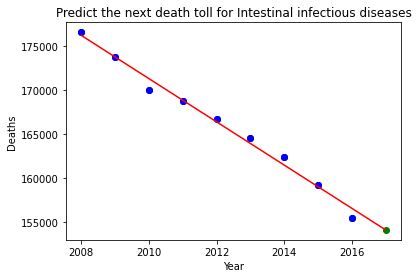

In [168]:
plt.title('Predict the next death toll for Intestinal infectious diseases')  
plt.xlabel('Year')  
plt.ylabel('Deaths') 
plt.scatter(X,y,color="blue")
new_y = [m*i+c for i in np.append(X, to_predict_x)]
new_y = np.array(new_y).reshape(-1,1)
plt.scatter(X,y,color="blue")
plt.scatter(to_predict_x, predicted_y, color="green")
plt.plot(np.append(X,to_predict_x),new_y,color="red")
plt.show()

In [169]:
world_death_df.at[9, intestine_col] = predicted_y
world_death_df

,Entity,Code,Year,Meningitis,Lower respiratory infections,Intestinal infectious diseases,Protein-energy malnutrition,Terrorism,Cardiovascular diseases,Alzheimer disease and other dementias,...,Neonatal disorders,Alcohol use disorders,Exposure to forces of nature,Diarrheal diseases,Environmental heat and cold exposure,Nutritional deficiencies,Self-harm,Conflict and terrorism,Diabetes mellitus,Poisonings
0,World,OWID_WRL,2008,348040.083847,2.657275e+06,176583.045171,304321.884855,9157.0,1.500828e+07,1.790400e+06,...,2.304429e+06,179987.013172,235496.829431,1.867836e+06,60384.613529,345703.367968,789447.007136,58795.082371,1.045381e+06,78008.099106
1,World,OWID_WRL,2009,340514.177436,2.639562e+06,173745.686452,297263.561629,9273.0,1.527431e+07,1.863444e+06,...,2.258315e+06,175052.864372,9254.003678,1.865671e+06,59023.804629,338690.981517,791222.757559,67916.308722,1.070186e+06,77339.491051
2,World,OWID_WRL,2010,331205.914662,2.623649e+06,170071.404053,299956.052686,7827.0,1.561962e+07,1.943961e+06,...,2.211208e+06,174237.378348,248454.699157,1.857640e+06,115382.599926,341835.027741,796083.645174,50608.273695,1.096402e+06,77298.902918
3,World,OWID_WRL,2011,325000.383494,2.616651e+06,168716.792532,288907.141759,8246.0,1.585974e+07,2.025064e+06,...,2.162070e+06,170736.669200,31964.196615,1.793641e+06,57402.483668,329818.068512,793977.906088,100568.611560,1.129959e+06,76227.682073
4,World,OWID_WRL,2012,316965.020009,2.605154e+06,166735.397312,269574.084338,15497.0,1.611549e+07,2.098871e+06,...,2.110626e+06,169930.031855,6625.594444,1.725018e+06,57658.367887,309650.953725,786335.554940,111432.890101,1.168569e+06,75414.520357
5,World,OWID_WRL,2013,312013.523643,2.590482e+06,164572.376351,259203.023575,22273.0,1.628402e+07,2.168918e+06,...,2.050610e+06,170965.247716,19050.473289,1.664193e+06,55823.991356,298365.543019,779212.549795,115138.255671,1.202743e+06,74906.641101
6,World,OWID_WRL,2014,306484.322622,2.579538e+06,162420.462719,250311.830788,44490.0,1.662836e+07,2.253866e+06,...,1.989193e+06,173684.698467,6503.060539,1.619718e+06,55072.834100,289184.845108,781716.697241,182239.944451,1.249135e+06,74439.682294
7,World,OWID_WRL,2015,298711.517721,2.582199e+06,159257.591692,243750.598948,38853.0,1.713999e+07,2.353634e+06,...,1.925458e+06,178372.485978,14748.187609,1.578439e+06,57740.167042,282498.011863,782941.162890,137629.287532,1.299556e+06,74394.517062
8,World,OWID_WRL,2016,295878.990018,2.574625e+06,155448.606112,236429.610442,34871.0,1.752437e+07,2.440042e+06,...,1.852924e+06,181679.094522,7261.252562,1.550848e+06,54183.052891,274881.027448,788674.564776,158356.402289,1.346428e+06,73643.079320
9,World,OWID_WRL,2017,288021.105387,2.558606e+06,154107.234208,231770.992044,26445.0,1.779095e+07,2.514619e+06,...,1.783770e+06,184934.241760,9602.935057,1.569556e+06,53349.518780,269996.917689,793823.469135,129720.145674,1.369849e+06,72370.531920


## Categorised deaths

In [170]:
cat_death_df = modify_and_drop_cols(raw_cat_death_df, {}, [])
cat_death_df

,Entity,Code,Year,Non-communicable diseases,"Communicable, maternal, neonatal, and nutritional diseases",Injuries
0,Afghanistan,AFG,2008,107108.631648,102268.763448,29830.866176
1,Afghanistan,AFG,2009,106507.662016,99423.405087,30147.362477
2,Afghanistan,AFG,2010,106608.183852,94345.202146,31447.703741
3,Afghanistan,AFG,2011,107238.990094,92104.020176,32062.256680
4,Afghanistan,AFG,2012,107575.457736,89889.581949,34518.747794
...,...,...,...,...,...,...
2305,Zimbabwe,ZWE,2013,43813.657226,82444.005046,10900.259416
2306,Zimbabwe,ZWE,2014,43708.402562,73746.515011,10656.544622
2307,Zimbabwe,ZWE,2015,43853.733855,68742.793671,10680.832731
2308,Zimbabwe,ZWE,2016,44364.468727,65173.657699,10735.347076


### Extract world data

In [171]:
world_cat_death_df = extract_world_data(cat_death_df)
world_cat_death_df

,Entity,Code,Year,Non-communicable diseases,"Communicable, maternal, neonatal, and nutritional diseases",Injuries
0,World,OWID_WRL,2008,3.418150e+07,1.308734e+07,4.634715e+06
1,World,OWID_WRL,2009,3.483548e+07,1.281121e+07,4.425399e+06
2,World,OWID_WRL,2010,3.559222e+07,1.252802e+07,4.718076e+06
3,World,OWID_WRL,2011,3.621622e+07,1.219007e+07,4.487698e+06
4,World,OWID_WRL,2012,3.683037e+07,1.180971e+07,4.462361e+06
5,World,OWID_WRL,2013,3.735997e+07,1.146154e+07,4.452354e+06
6,World,OWID_WRL,2014,3.825766e+07,1.117078e+07,4.507679e+06
7,World,OWID_WRL,2015,3.945300e+07,1.088245e+07,4.486745e+06
8,World,OWID_WRL,2016,4.040355e+07,1.060071e+07,4.505297e+06
9,World,OWID_WRL,2017,4.107113e+07,1.038987e+07,4.484722e+06


# Plotting